# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Cosine similarity
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

In [2]:
# range of requested correlation coefficients
rs = np.linspace(-1,1,100) # requested correlations used in loop from -1 to +1

# sample size
N = 500


# initialize output matrix
corrs = np.zeros((len(rs),2))


# loop over a range of r values
for ri in range(len(rs)):
    
    # generate data - random numbers with a specified correlation coefficient
    x = np.random.randn(N)
    # rs is the specified correlations we use throughout these loops, we explore a range of imposed correlations
    y = x*rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)
    
    # optional mean-off-centering
    # This will demonstrate that the cosine similarity is much different when we add a mean offset to the data from the pearson correlation (which subtracts the mean)
    #x = x+10 # 10 is a relatively large offset here since the variability is 1 and the original data has a mean of 0
    #y = y+10

    # Note that both cosine similarity and correlation are not wrong, they just tell us different things based on different assumptions
    # With Pearson r we care about whether the data values are generally going up and down together and whether large or small jumps are seen in both vars at the same time.
    # The relationships between the values are what is important and whether the variables generally go up and down together is what's important.
    
    # compute correlation
    corrs[ri,0] = np.corrcoef(x,y)[0,1]
    
    # compute cosine similarity
    cs_num = sum(x*y) # numerator: each element in x times each element in y summed up
    cs_den = np.sqrt(sum(x*x)) * np.sqrt(sum(y*y)) # denominator: in algebra the norm of vector x and norm of vector y in technical terms
    corrs[ri,1] = cs_num / cs_den # the ratio is the cosine similarity
    
    # you can use the spatial module instead as well for a built in function:
    #corrs[ri,1] = 1-spatial.distance.cosine(x,y) # computes cosine distance, that's why we have the 1 minus in front.
    

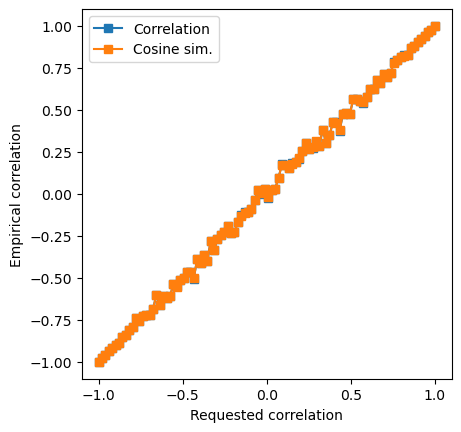

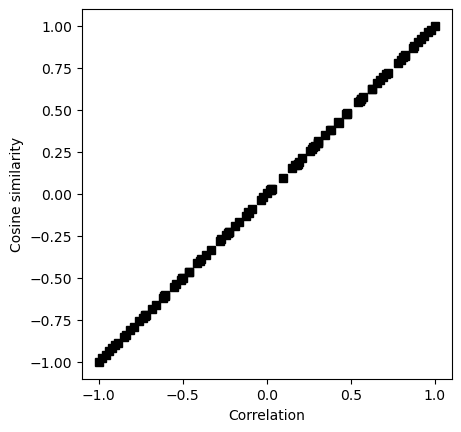

In [3]:
## visualize the results

plt.plot(rs,corrs[:,0],'s-',label='Correlation') # blue
plt.plot(rs,corrs[:,1],'s-',label='Cosine sim.') # orange points
plt.legend()
plt.xlabel('Requested correlation')
plt.ylabel('Empirical correlation')
plt.axis('square')
plt.show()
# shows that the cosine similarity and empirical correlation are pretty much identical (you see almost no blue since they overlap)


plt.plot(corrs[:,0],corrs[:,1],'ks')
plt.axis('square')
plt.xlabel('Correlation')
plt.ylabel('Cosine similarity')
plt.show()

In [4]:
# their empirical correlation
np.corrcoef(corrs.T) # shows the correlation between the cosine similarity result and the pearson correlation result

array([[1.        , 0.99999455],
       [0.99999455, 1.        ]])